In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
PATH = '/Users/hoangchu/Downloads/MATH158_Final/Data/cleaned_data.csv'
RESPONSE_COL_NAME = 'price'
ROW = 0
COL = 1

In [3]:
df = pd.read_csv(PATH)

In [4]:
y = df[RESPONSE_COL_NAME]
X = df.drop(RESPONSE_COL_NAME, axis = COL)
X = sm.add_constant(X)

In [5]:
from sklearn.model_selection import train_test_split

# If you don’t specify the random_state in your code, then every time you run your code 
# a new random value is generated and the train and test datasets would have different values each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
assert y_train.min() <= y_test.min() <= y_test.max() <= y_train.max()

In [6]:
def get_distribution_plot(data_list, bins_count):
    plt.hist(data_list, bins=bins_count, density=True, alpha=0.5, color='g')

    plt.title('Distribution plot')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.show()    

In [7]:
def linear_regression(X, y):
    if 'const' not in set(X.columns): X = sm.add_constant(X)
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    return results

In [8]:
def residual_vs_predicted_plot(residuals, y_predict):
    # Create the plot
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_predict, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs. Predicted')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.show()

In [9]:
lm_model = linear_regression(X_train, y_train)

In [10]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, lm_model.predict(X_test)))

10306.159184967863

In [11]:
def min_max_scaled_df(X, intercept_colname):
    X_copy = X.copy()
    non_encoding_colnames = [col for col in X.columns if \
                            X_copy[col].dtype != 'int64' or X_copy[col].nunique() >= 10]
    
    max_sub_df = X_copy[non_encoding_colnames].max()
    min_sub_df = X_copy[non_encoding_colnames].min()

    X_copy[non_encoding_colnames] = (X_copy[non_encoding_colnames] - min_sub_df) / (max_sub_df - min_sub_df)
    X_copy[intercept_colname] = 0
    
    return X_copy

In [12]:
X_train_scaled = min_max_scaled_df(X_train, 'const')
y_train_scaled = (y_train - y_train.min()) / (y_train.max() - y_train.min())

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Define the LassoCV model
lasso_lm_model = LassoCV(alphas=None, random_state=42, cv = 10, fit_intercept = False, max_iter=2000)

# Fit the model
lasso_lm_model.fit(X_train_scaled, y_train_scaled)

In [ ]:
lasso_stayed_columns = np.array(X_train_scaled.columns[lasso_lm_model.coef_ != 0])
lasso_stayed_columns = np.append(lasso_stayed_columns, 'const')
len(lasso_stayed_columns)

18

In [ ]:
X_train_lasso = X_train[lasso_stayed_columns]
X_test_lasso = X_test[lasso_stayed_columns]

In [ ]:
X_test_lasso = X_test_lasso.drop(['is_wheel_system_display_Four-Wheel Drive', 'is_wheel_system_display_4X2', 'is_wheel_system_display_Front-Wheel Drive'], axis=COL)
X_train_lasso = X_train_lasso.drop(['is_wheel_system_display_Four-Wheel Drive', 'is_wheel_system_display_4X2', 'is_wheel_system_display_Front-Wheel Drive'], axis=COL)

In [ ]:
def get_qq_plot(residuals):
    sm.qqplot(residuals, line = 'q') 
    plt.title('Q-Q Plot')
    plt.show()    

In [ ]:
def get_lambda_boxcox(y):
    from scipy import stats
    transformed_data, lambda_val = stats.boxcox(y.copy())
    return transformed_data, lambda_val

In [ ]:
y_boxcox, lambda_boxcox = get_lambda_boxcox(y_train)
lambda_boxcox

0.24565927294904744

In [ ]:
y_train_boxcox = y_boxcox
y_test_boxcox = (y_test**lambda_boxcox - 1) / lambda_boxcox,

In [ ]:
boxcox_lm_model = linear_regression(X_train.copy(), y_train_boxcox)
boxcox_lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 7.040e+05
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:43:57   Log-Likelihood:            -5.5324e+06
No. Observations:             2201062   AIC:                         1.106e+07
Df Residuals:                 2201047   BIC:                         1.106e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
city                               0.1084      0.002     53.320      0.000       0.104       0.112
engine_type                       -2.1238      0.007   -309.713      0.000      -2.137      -2.110
horsepower                         0.0412   2.98e-05   1382.139      0.000       0.041       0.041
make_name                         -1.0338      0.009   -116.498      0.000      -1.051      -1.016
model_name                        -1.0653      0.008   -129.394      0.000      -1.081      -1.049
seller_rating                      0.6030      0.004    151.275      0.000       0.595       0.611
year                               1.0021      0.001   1301.954      0.000       1.001       1.004
is_body_type_Pickup Truck         -1.3603      0.009   -159.434      0.000      -1.377      -1.344
is_fuel_type_Flex Fuel Vehicle    -2.2486      0.010   -235.754      0.000      -2.267      -2.230
is_is_new_False                   -2.0619      0.005   -394.101      0.000      -2.072      -2.052
is_franchise_dealer_False         -1.3135      0.006   -213.233      0.000      -1.326      -1.301
is_wheel_system_FWD               -2.1115      0.005   -412.170      0.000      -2.122      -2.101
is_wheel_system_4WD                0.5366      0.007     72.232      0.000       0.522       0.551
is_wheel_system_4X2               -0.8364      0.012    -69.620      0.000      -0.860      -0.813
const                          -1973.6201      1.547  -1275.843      0.000   -1976.652   -1970.588
==============================================================================
Omnibus:                   869318.546   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28042423.065
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                      20.301   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(lambda_ * y + 1, 1 / lambda_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


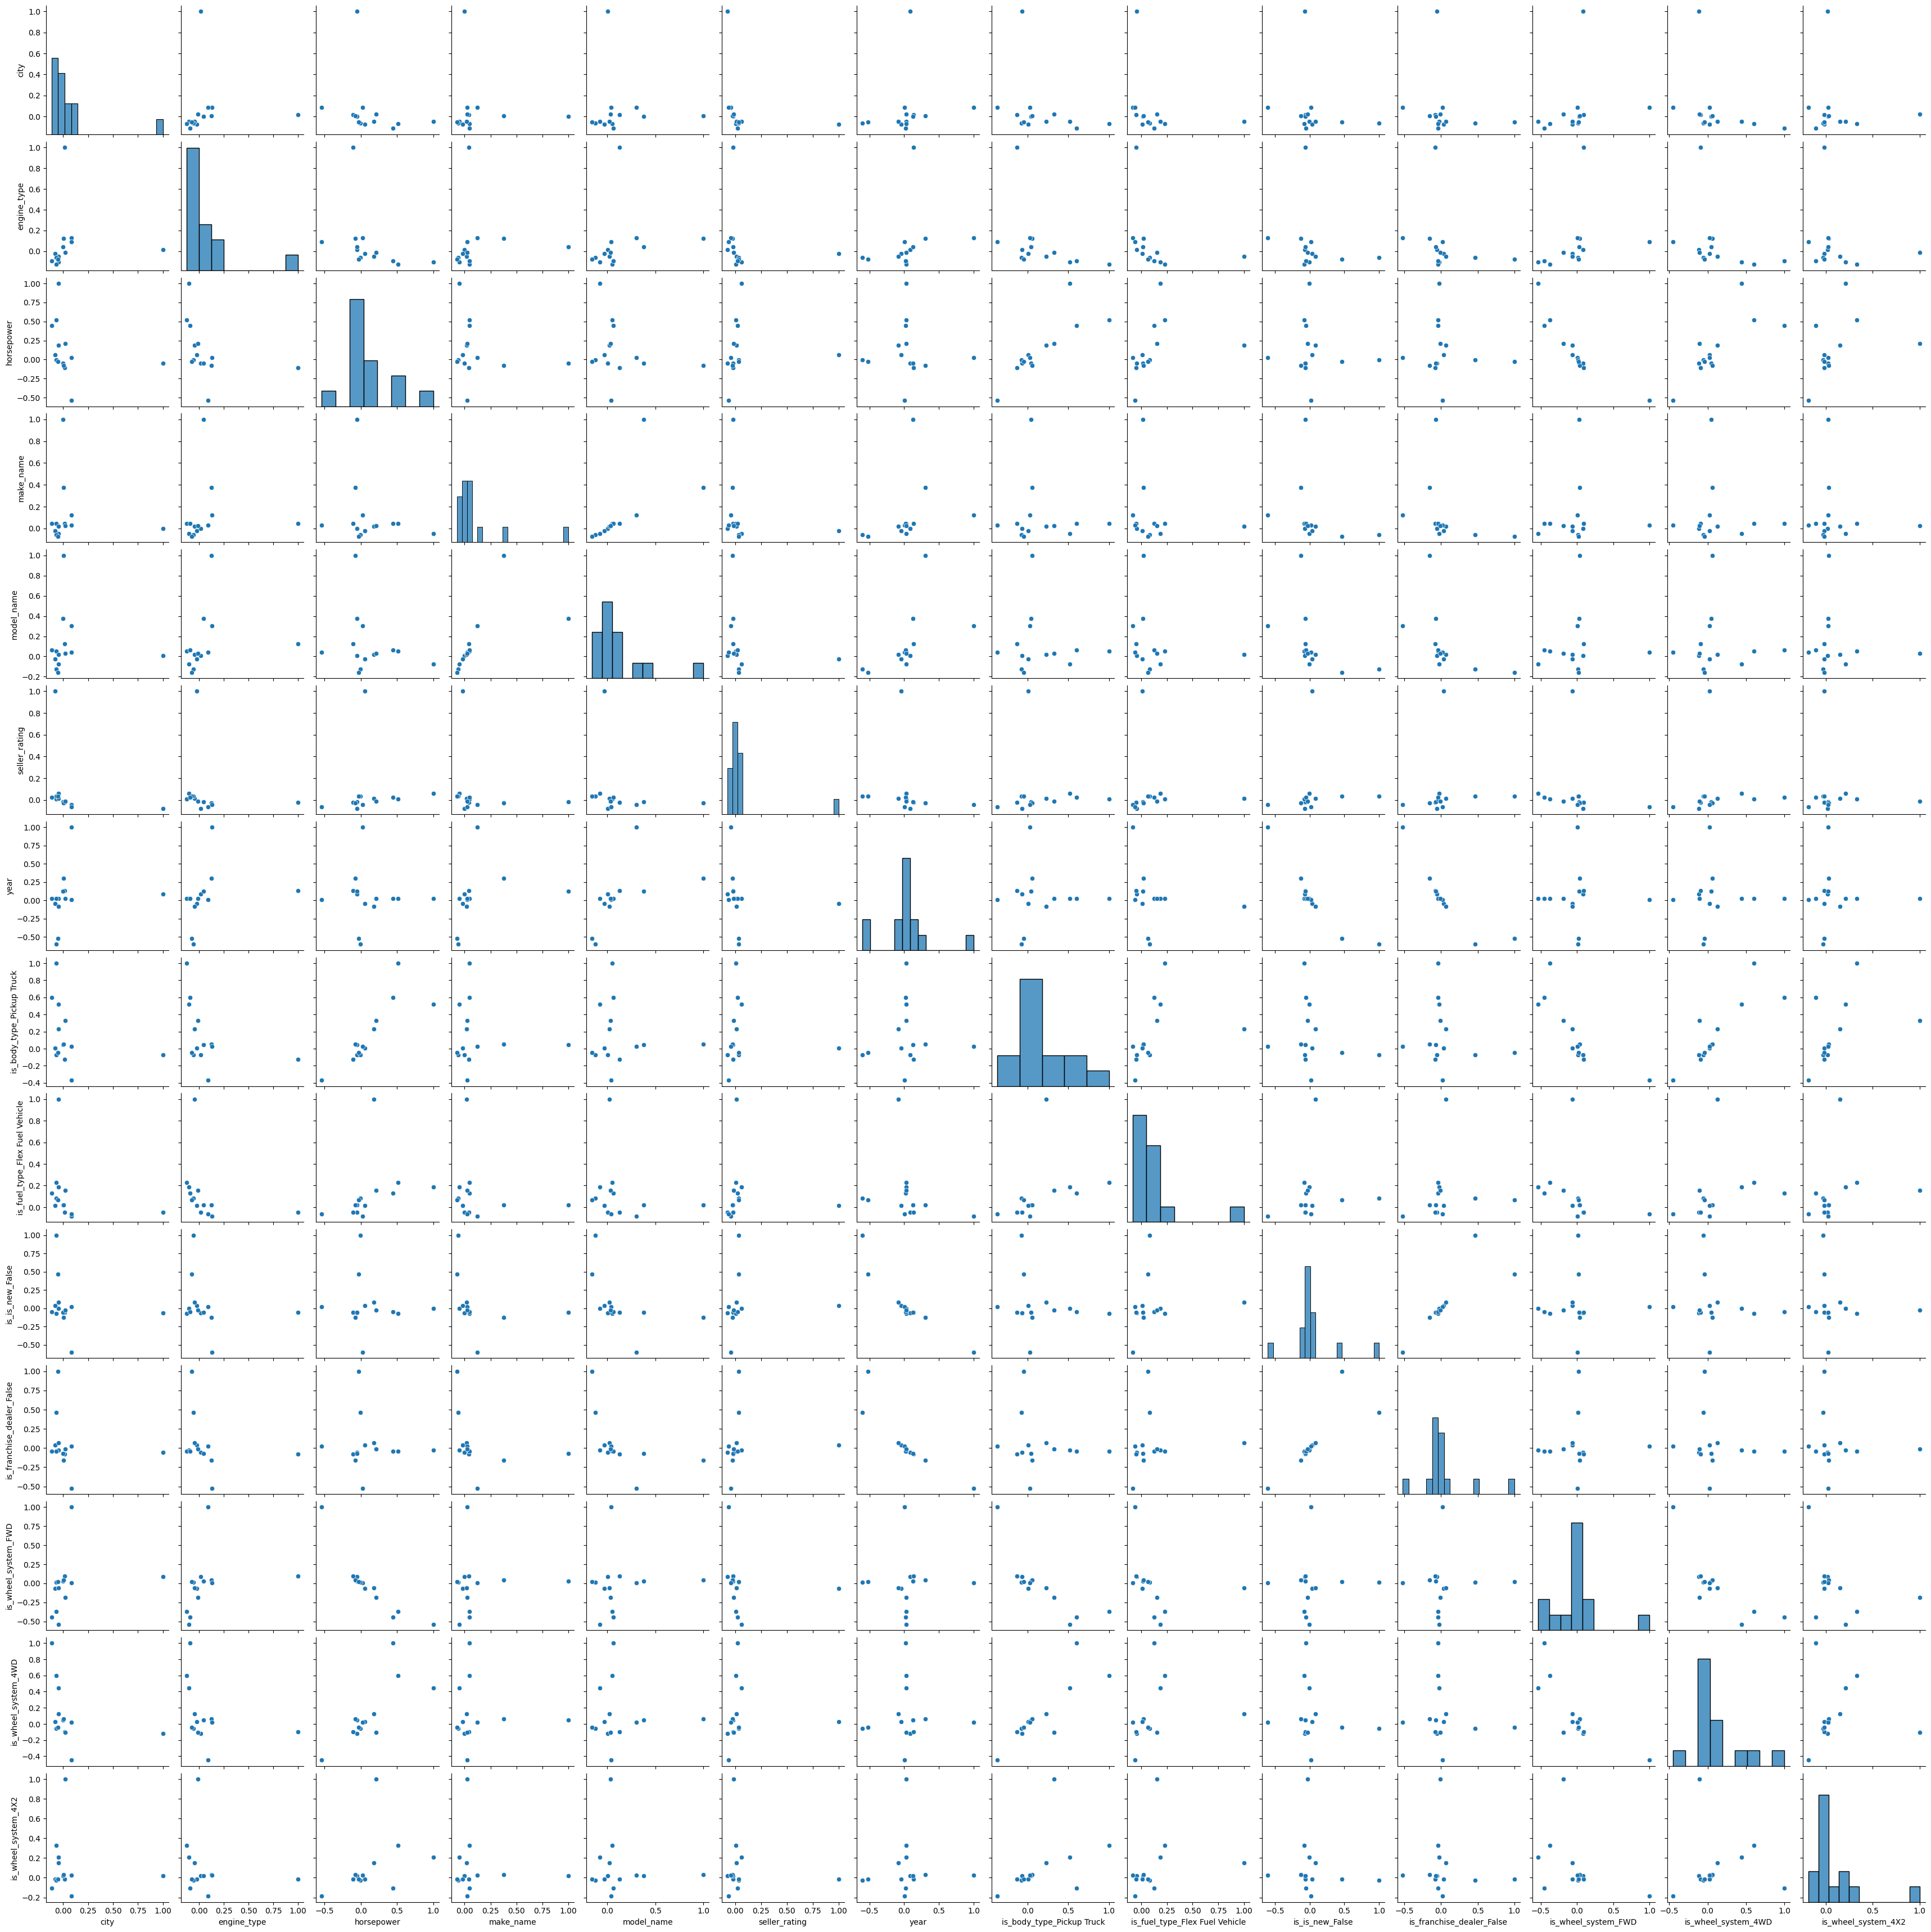

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot
sns.pairplot(X_train_lasso.drop('const', axis=COL).corr())

# Display the plot
plt.show()

In [ ]:
X_train_lasso.columns

Index(['city', 'engine_type', 'horsepower', 'make_name', 'model_name',
       'seller_rating', 'year', 'is_body_type_Pickup Truck',
       'is_fuel_type_Flex Fuel Vehicle', 'is_is_new_False',
       'is_franchise_dealer_False', 'is_wheel_system_FWD',
       'is_wheel_system_4WD', 'is_wheel_system_4X2', 'const'],
      dtype='object')

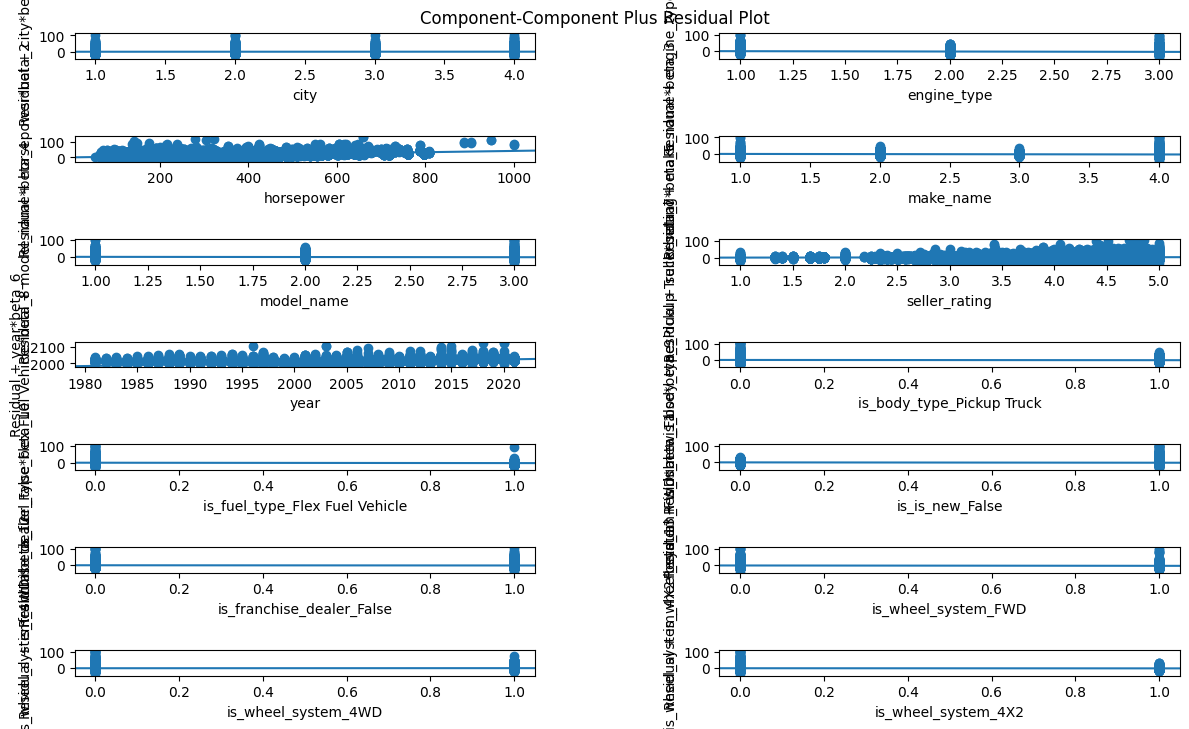

In [ ]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_ccpr_grid(boxcox_lm_model, fig = fig)
plt.subplots_adjust(wspace=0.4, hspace=3)  # You can adjust the spacing as needed
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_dataframe(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    return X_scaled_df

In [ ]:
X_train_lasso_no_b0 = X_train_lasso.drop('const', axis=COL)
temp_X_train_lasso = sm.add_constant(X_train_lasso_no_b0 - X_train_lasso_no_b0.mean())
temp_X_train_lasso

,const,city,engine_type,horsepower,make_name,model_name,seller_rating,year,is_body_type_Pickup Truck,is_fuel_type_Flex Fuel Vehicle,is_is_new_False,is_franchise_dealer_False,is_wheel_system_FWD,is_wheel_system_4WD,is_wheel_system_4X2
645005,1.0,0.689124,0.059717,-66.2074,0.026903,0.056679,-0.071143,2.231441,-0.147861,-0.051338,-0.520378,-0.191558,-0.442728,-0.201536,-0.041826
1241888,1.0,0.689124,-0.940283,197.7926,0.026903,0.056679,-0.043870,2.231441,0.852139,-0.051338,-0.520378,-0.191558,-0.442728,0.798464,-0.041826
2593956,1.0,0.689124,0.059717,-97.2074,0.026903,0.056679,0.395524,2.231441,-0.147861,-0.051338,-0.520378,-0.191558,0.557272,-0.201536,-0.041826
1743917,1.0,0.689124,0.059717,32.7926,0.026903,0.056679,0.312191,2.231441,-0.147861,-0.051338,-0.520378,-0.191558,-0.442728,-0.201536,-0.041826
217299,1.0,0.689124,0.059717,117.7926,0.026903,0.056679,-2.271143,-0.768559,-0.147861,-0.051338,0.479622,0.808442,-0.442728,-0.201536,-0.041826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,1.0,0.689124,0.059717,47.7926,0.026903,0.056679,-0.694220,2.231441,-0.147861,-0.051338,-0.520378,-0.191558,-0.442728,-0.201536,-0.041826
1692743,1.0,0.689124,0.059717,-2.2074,0.026903,0.056679,-0.532681,-0.768559,-0.147861,-0.051338,0.479622,-0.191558,0.557272,-0.201536,-0.041826
2356330,1.0,0.689124,0.059717,22.7926,0.026903,0.056679,0.328857,2.231441,-0.147861,-0.051338,-0.520378,-0.191558,-0.442728,0.798464,-0.041826
2229084,1.0,0.689124,0.059717,39.7926,0.026903,0.056679,-0.985428,0.231441,-0.147861,-0.051338,0.479622,-0.191558,0.557272,-0.201536,-0.041826


In [ ]:
boxcox_lm_model = linear_regression(temp_X_train_lasso, y_train_boxcox)
boxcox_lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 7.040e+05
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:00:18   Log-Likelihood:            -5.5324e+06
No. Observations:             2201062   AIC:                         1.106e+07
Df Residuals:                 2201047   BIC:                         1.106e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             45.4472      0.002   2.26e+04      0.000      45.443      45.451
city                               0.1084      0.002     53.320      0.000       0.104       0.112
engine_type                       -2.1238      0.007   -309.713      0.000      -2.137      -2.110
horsepower                         0.0412   2.98e-05   1382.139      0.000       0.041       0.041
make_name                         -1.0338      0.009   -116.498      0.000      -1.051      -1.016
model_name                        -1.0653      0.008   -129.394      0.000      -1.081      -1.049
seller_rating                      0.6030      0.004    151.275      0.000       0.595       0.611
year                               1.0021      0.001   1301.954      0.000       1.001       1.004
is_body_type_Pickup Truck         -1.3603      0.009   -159.434      0.000      -1.377      -1.344
is_fuel_type_Flex Fuel Vehicle    -2.2486      0.010   -235.754      0.000      -2.267      -2.230
is_is_new_False                   -2.0619      0.005   -394.101      0.000      -2.072      -2.052
is_franchise_dealer_False         -1.3135      0.006   -213.233      0.000      -1.326      -1.301
is_wheel_system_FWD               -2.1115      0.005   -412.170      0.000      -2.122      -2.101
is_wheel_system_4WD                0.5366      0.007     72.232      0.000       0.522       0.551
is_wheel_system_4X2               -0.8364      0.012    -69.620      0.000      -0.860      -0.813
==============================================================================
Omnibus:                   869318.546   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28042423.060
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                      20.301   Cond. No.                         609.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import mean_squared_error
import math

print(math.sqrt(mean_squared_error(y_train, 
                         inverse_boxcox(boxcox_lm_model.predict(X_train_lasso), lambda_boxcox))
                ))
print(math.sqrt(mean_squared_error(y_test, 
                         inverse_boxcox(boxcox_lm_model.predict(X_test_lasso), lambda_boxcox)))
)
boxcox_residuals = y_test - inverse_boxcox(boxcox_lm_model.predict(X_test_lasso), lambda_boxcox)

10875.260219335987
9985.756424706704


In [ ]:
np.linalg.cond(scale_dataframe(X_train_lasso.drop('const', axis=COL)).corr())

10.915098149834638

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_vs_fitted(residuals, predicted_y):

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({"Residuals": residuals, "Fitted": predicted_y})

    # Create the plot
    plt.figure(figsize=(20, 8))  # Increase the size of the plot
    sns.scatterplot(data=plot_df, x="Fitted", y="Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuals vs Fitted Values")
    plt.show()

In [ ]:
def calculate_condition_indices(X):
    # Convert the DataFrame to a numpy array
    X_values = X.values
    
    # Calculate the eigenvalues of the design matrix
    eigenvalues = np.linalg.eigvals(X_values.T @ X_values)
    
    # Get the indices that would sort the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    # Sort the eigenvalues using the sorted indices
    eigenvalues_sorted = eigenvalues[sorted_indices]
    
    # Calculate the condition indices
    condition_indices = np.sqrt(eigenvalues_sorted[0] / eigenvalues_sorted)
    
    # Round the condition indices to 4 decimal places and format to avoid scientific notation
    condition_indices_rounded = ["{:.4f}".format(idx) for idx in condition_indices]
    
    # Create a DataFrame for the condition indices
    condition_indices_df = pd.DataFrame({
        'Column Name': X.columns[sorted_indices],
        'Condition Index': condition_indices_rounded
    })

    return condition_indices_df

In [ ]:
calculate_condition_indices(scale_dataframe(X_train_lasso))

/var/folders/pc/1h9xlpvd7rd5xtvc_7rkfznr0000gn/T/ipykernel_94767/486121185.py:15: RuntimeWarning: divide by zero encountered in divide
  condition_indices = np.sqrt(eigenvalues_sorted[0] / eigenvalues_sorted)


,Column Name,Condition Index
0,city,1.0000
1,engine_type,1.0769
2,horsepower,1.4221
3,make_name,1.5055
4,model_name,1.6110
5,seller_rating,1.6728
6,year,1.6925
7,is_body_type_Pickup Truck,1.7393
8,is_wheel_system_4WD,2.0337
9,is_wheel_system_4X2,2.0829


In [ ]:
def vif_statsmodels(X, intercept_colname):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant
    
    X_copy = X.copy()
    if intercept_colname not in X_copy: X_copy = add_constant(X_copy)
    
    vif = pd.DataFrame()
    vif["variables"] = X_copy.columns
    vif["VIF"] = [(variance_inflation_factor(X_copy.values, i), 4) for i in range(X_copy.shape[1])]
    return vif
    
def vif_custom(X, lam):
    from numpy.linalg import inv

    n_cols = X.shape[1] - 1
    vif = np.zeros((len(lam), n_cols))

    rxx = X.iloc[:, :n_cols].corr().values
    rxy = X.corr().iloc[:n_cols, n_cols].values
    for i in range(len(lam)):
        tmp1 = inv(rxx + lam[i] * np.eye(n_cols))
        vif[i, :] = np.diag(np.dot(np.dot(tmp1, rxx), tmp1))
    
    vif_df = pd.DataFrame(vif, columns=X.columns[:-1], index=lam)
    
    return vif_df.T

In [ ]:
def get_similarColPairs(df):
    answers = []
    
    columns = df.columns
    for col1_i in range(0, len(columns)):
        col1 = columns[col1_i]
        for col2_i in range(col1_i + 1, len(columns)):
            col2 = columns[col2_i]
            if np.round(np.sum(df[col1] - df[col2]), 5) == 0: answers.append([col1, col2])
    
    return answers

https://stats.stackexchange.com/questions/130996/variance-inflation-factor-less-than-1-in-ridge-regression

https://math.stackexchange.com/questions/2681911/prove-vif-of-jth-predictor-is-jth-diagonal-entry-of-inverse-of-correlation-matri

In [ ]:
def center_scaled_df(X, intercept_colname):
    X_copy = X.copy()
    non_encoding_colnames = [col for col in X_copy.columns if \
                            X_copy[col].dtype != 'int64' or X_copy[col].nunique() >= 10]
    
    mean_sub_df = X_copy[non_encoding_colnames].mean()

    X_copy[non_encoding_colnames] = (X_copy[non_encoding_colnames] - mean_sub_df)
    
    return X_copy.drop(intercept_colname, axis=COL)

In [ ]:
def standardize_scaled_df(X, intercept_colname):
    X_copy = X.copy()
    if intercept_colname in X_copy.columns: X_copy = X_copy.drop(intercept_colname, axis=COL)
    
    non_encoding_colnames = [col for col in X_copy.columns if \
                            X_copy[col].dtype != 'int64' or X_copy[col].nunique() >= 10]
    
    mean_sub_df = X_copy[non_encoding_colnames].mean()
    std_sub_df = X_copy[non_encoding_colnames].std()

    X_copy[non_encoding_colnames] = (X_copy[non_encoding_colnames] - mean_sub_df) / std_sub_df
    
    return X_copy

In [ ]:
X_train_std = standardize_scaled_df(X_train, 'const')

In [ ]:
# vif_statsmodels_df = vif_statsmodels(X_train_std.copy(), 'const')

In [ ]:
vif_df, ridge_beta_df = vif_custom(X_train_std.copy(), [0])
vif_df.T.head()

TypeError: type numpy.ndarray doesn't define __round__ method

In [29]:
vif_df.T.head()

,0
back_legroom,1.583718
city,1.085481
daysonmarket,1.163538
engine_displacement,6.345453
engine_type,1.990666


In [30]:
vif_statsmodels_df.head()

,variables,VIF
0,const,530.271953
1,back_legroom,1.583747
2,city,1.085473
3,daysonmarket,1.163727
4,engine_displacement,6.345435


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_lambda = 0.13
scaler = StandardScaler()
X_train_lasso_std = scaler.fit_transform(X_train_lasso.drop('const', axis=COL))
y_train_std = (y_train - y_train.mean()) / y_train.std()

In [ ]:
ridge = Ridge(alpha=ridge_lambda)
ridge.fit(X_train_lasso_std, y_train_std)

In [ ]:
# Calculate the intercept for the original scale
intercept_orig = ridge.intercept_ - np.sum(scaler.mean_ * ridge.coef_ / scaler.scale_)

# Calculate the coefficients for the original scale
coef_orig = ridge.coef_ / scaler.scale_

In [ ]:
coef_orig

In [ ]:
ridge_betas_orig = np.append(coef_orig, intercept_orig).reshape(-1, 1)
ridge_betas_orig.shape

In [ ]:
ridge_results_df = pd.DataFrame()
ridge_results_df['predicted_y'] = (X_test_lasso @ ridge_betas_orig)
ridge_results_df['actual_y'] = y_test_boxcox
ridge_results_df

In [12]:

import numpy as np
import pandas as pd
from collections import defaultdict

def correlation_map(X):
    from collections import defaultdict
    # Ensure X is a pandas DataFrame
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
        
    # Calculate correlation matrix
    corr_matrix = X.corr().values
    
    # Create a map with default value of an empty set
    corr_map = defaultdict(set)
    
    # Get column names
    col_names = X.columns
    
    # Iterate over unique correlation values
    for i in range(len(col_names)):
        for j in range(i+1, len(col_names)):
            # Round to avoid floating point precision issues
            corr_value = abs(round(corr_matrix[i, j], 2))
            
            # Add column names to the set of this correlation value
            corr_map[corr_value].add((col_names[i], col_names[j]))
    
    return dict(corr_map)

In [13]:
corr_map = correlation_map(X_train.drop('const', axis=COL))

In [14]:
sorted_corr_map = dict(sorted(corr_map.items(), key=lambda item: item[0], reverse=True))
sorted_corr_map

{1.0: {('is_wheel_system_display_4X2', 'is_wheel_system_4X2'),
  ('is_wheel_system_display_Four-Wheel Drive', 'is_wheel_system_4WD'),
  ('is_wheel_system_display_Front-Wheel Drive', 'is_wheel_system_FWD'),
  ('is_wheel_system_display_Rear-Wheel Drive', 'is_wheel_system_RWD')},
 0.97: {('length', 'wheelbase')},
 0.85: {('fuel_tank_volume', 'length')},
 0.84: {('fuel_tank_volume', 'wheelbase'),
  ('wheelbase', 'is_body_type_Pickup Truck')},
 0.83: {('engine_displacement', 'horsepower'), ('mileage', 'year')},
 0.82: {('engine_displacement', 'fuel_tank_volume')},
 0.78: {('engine_displacement', 'length')},
 0.77: {('length', 'is_body_type_Pickup Truck')},
 0.76: {('engine_displacement', 'wheelbase'),
  ('fuel_tank_volume', 'horsepower')},
 0.73: {('horsepower', 'length')},
 0.71: {('fuel_tank_volume', 'height'), ('height', 'wheelbase')},
 0.7: {('horsepower', 'wheelbase')},
 0.68: {('height', 'length')},
 0.66: {('height', 'is_body_type_Sedan')},
 0.64: {('mileage', 'is_is_new_False'), ('w

In [15]:
sorted_corr_count_map = {}
for corr in sorted_corr_map:
    if corr not in sorted_corr_count_map: sorted_corr_count_map[corr] = 0
    sorted_corr_count_map[corr] += len(sorted_corr_map[corr])
sorted_corr_count_map

{1.0: 4,
 0.97: 1,
 0.85: 1,
 0.84: 2,
 0.83: 2,
 0.82: 1,
 0.78: 1,
 0.77: 1,
 0.76: 2,
 0.73: 1,
 0.71: 2,
 0.7: 1,
 0.68: 1,
 0.66: 1,
 0.64: 2,
 0.63: 4,
 0.6: 3,
 0.59: 2,
 0.58: 1,
 0.57: 4,
 0.55: 2,
 0.54: 2,
 0.53: 2,
 0.52: 6,
 0.5: 3,
 0.48: 2,
 0.46: 2,
 0.45: 8,
 0.44: 2,
 0.43: 2,
 0.42: 2,
 0.4: 3,
 0.39: 6,
 0.38: 3,
 0.37: 2,
 0.36: 1,
 0.35: 2,
 0.34: 2,
 0.33: 3,
 0.32: 5,
 0.31: 5,
 0.3: 8,
 0.29: 4,
 0.28: 6,
 0.27: 11,
 0.26: 6,
 0.25: 6,
 0.24: 7,
 0.23: 7,
 0.22: 11,
 0.21: 12,
 0.2: 6,
 0.19: 15,
 0.18: 13,
 0.17: 11,
 0.16: 17,
 0.15: 24,
 0.14: 9,
 0.13: 20,
 0.12: 29,
 0.11: 20,
 0.1: 21,
 0.09: 38,
 0.08: 53,
 0.07: 56,
 0.06: 61,
 0.05: 82,
 0.04: 98,
 0.03: 146,
 0.02: 229,
 0.01: 418,
 0.0: 470}

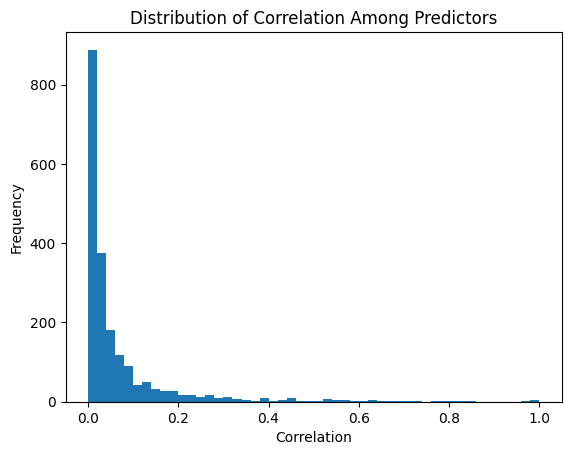

In [17]:
# Convert the dictionary to a list
correlation_list = [k for k, v in sorted_corr_count_map.items() for _ in range(v)]

# Create histogram
plt.hist(correlation_list, bins=50)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Among Predictors')
plt.show()